In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from shapely.affinity import scale

$$ \boxed{\frac{(x-h)^2}{a^2} + \frac{(y-k)^2}{b^2} = 1} $$

Where:

$x$ and $y$ are the coordinates of a point on the ellipse.
$h$ and $k$ are the coordinates of the center of the ellipse.
$a$ is the length of the semi-major axis of the ellipse.
$b$ is the length of the semi-minor axis of the ellipse.
The rotation angle $\theta$ is the angle between the major axis of the ellipse and the positive $x$-axis.

<Axes: >

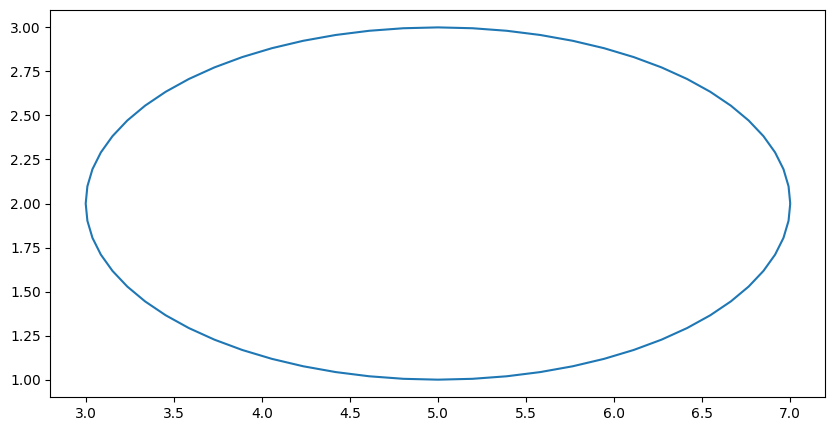

In [2]:
def cria_poligono_elipse(x, y, a, b):
    """ 
    Função que retorna um GeoSeries do GeoPandas 

    x e y são as coordenadas do ponto central da elipse no plano cartesiano;
    a é o comprimento do eixo horizontal da elipse
    b é o comprimento do eixo vertical da elipse
    
    
    """
    circulo = Point(x,y).buffer(1)
    elipse = scale(circulo, xfact=a, yfact=b)
    poligono_elipse = elipse.boundary.simplify(0.001)
    g = gpd.GeoSeries(poligono_elipse)
    return g
elipse = cria_poligono_elipse(5,2,2,1)
elipse.plot(cmap='tab10',figsize=(10,10))


shapely.geometry.polygon.Polygon

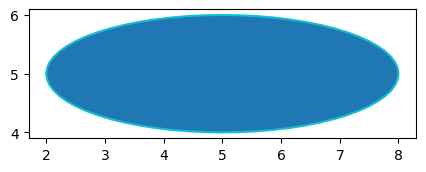

In [3]:
a = 1
b = 1

# Criar um círculo com centro em (0, 0) e raio 1
circle = Point(5, 5).buffer(1)
# Escalar o círculo para criar uma elipse com eixos principais 5 e 1
elipse = scale(circle, xfact=3, yfact=1)

# Converter a elipse em um polígono para plotar
elipse_polygon = elipse.boundary.simplify(0.0001)
tile = Point(8,5)
teste = Polygon(elipse_polygon)
g = gpd.GeoSeries([elipse, elipse_polygon])
g.plot(cmap='tab10',figsize=(5,5))
elipse.intersects(tile)
type(elipse)

In [4]:
import numpy as np
import pandas as pd
lista1 = np.arange(0,20,2)
lista2 = np.arange(0,10,1)
lista3 = np.array([1000, 800, 700, 550, 300, 200, 100, 80, 80, 50])
df = {"Latitude": lista1,
      "Longitude": lista2,
      "Elevation": lista3}
df = pd.DataFrame(df)
df.head(10)



Latitude  Longitude  Elevation
0         0          0       1000
1         2          1        800
2         4          2        700
3         6          3        550
4         8          4        300
5        10          5        200
6        12          6        100
7        14          7         80
8        16          8         80
9        18          9         50

In [5]:
list(zip(df['Longitude'],df['Latitude']))
pontos_geom = [Point(i) for i in zip(df['Longitude'],df['Latitude'])]

pontos_geometricos = []

for i in zip(df['Longitude'],df['Latitude']):
    pontos_geometricos.append(Point(i))
pontos_geom

pontos = gpd.GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=pontos_geom)
pontos.head()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Latitude  Longitude  Elevation                 geometry
0         0          0       1000  POINT (0.00000 0.00000)
1         2          1        800  POINT (1.00000 2.00000)
2         4          2        700  POINT (2.00000 4.00000)
3         6          3        550  POINT (3.00000 6.00000)
4         8          4        300  POINT (4.00000 8.00000)

<Axes: >

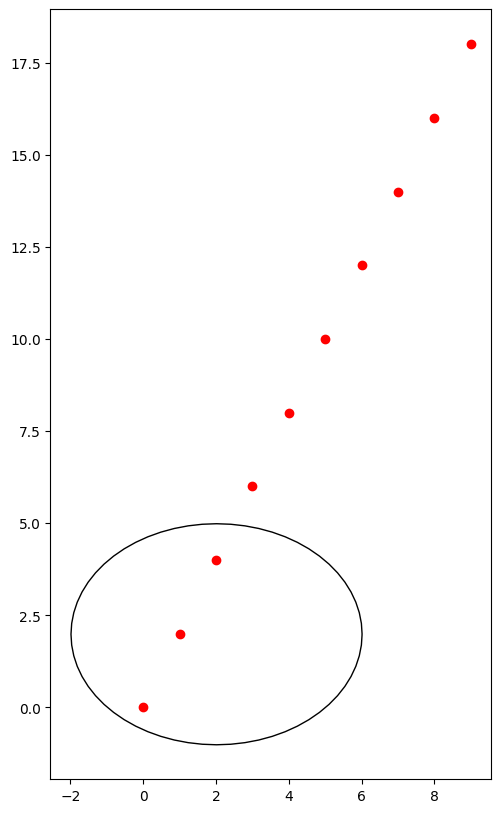

In [8]:
import tcc
elipse = tcc.cria_poligono_elipse(2,2,4,3)
elipse = gpd.GeoSeries(elipse, crs = 4326)
elipse.crs


base = elipse.plot(color = 'white', edgecolor = 'black',figsize=(10,10))
pontos.plot(ax = base, color = 'red', figsize=(10,10))

[700.]
nan
Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, geometry]
Index: []
[700.]
nan
Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, geometry]
Index: []
[700.]
nan
Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, geometry]
Index: []
[700.]
nan
Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, geometry]
Index: []
[700.]
nan
Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, geometry]
Index: []
[700.]
nan
Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, geometry]
Index: []
[700.]
nan
Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, geometry]
Index: []
[700.]
nan
Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, geometry]
Index: []


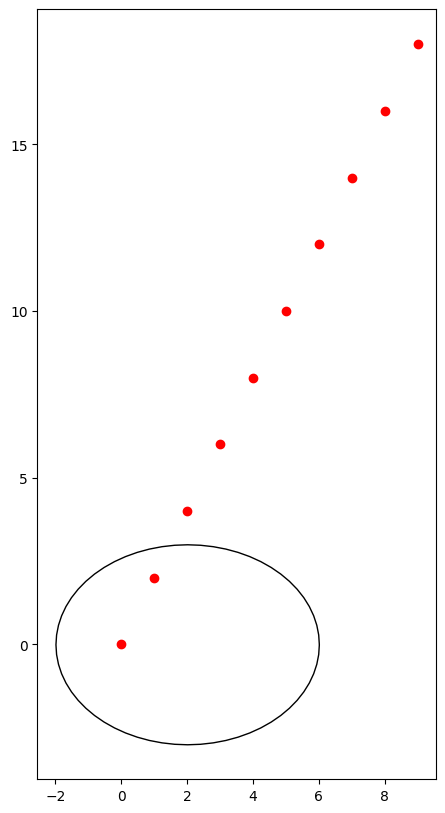

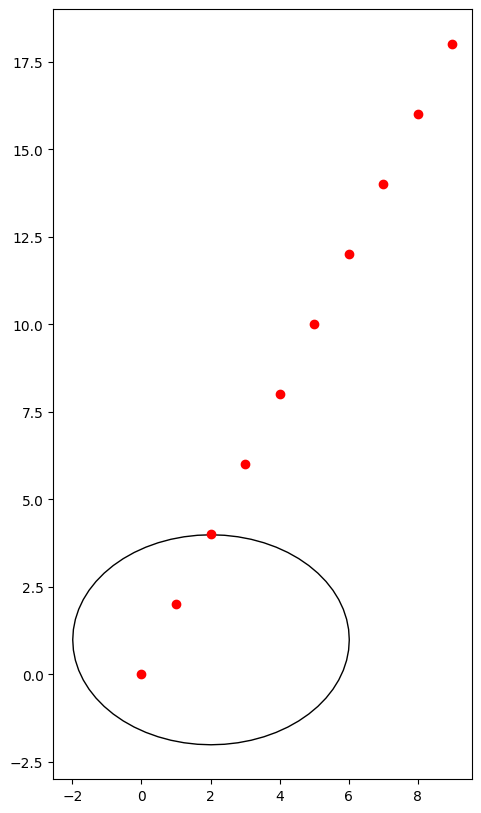

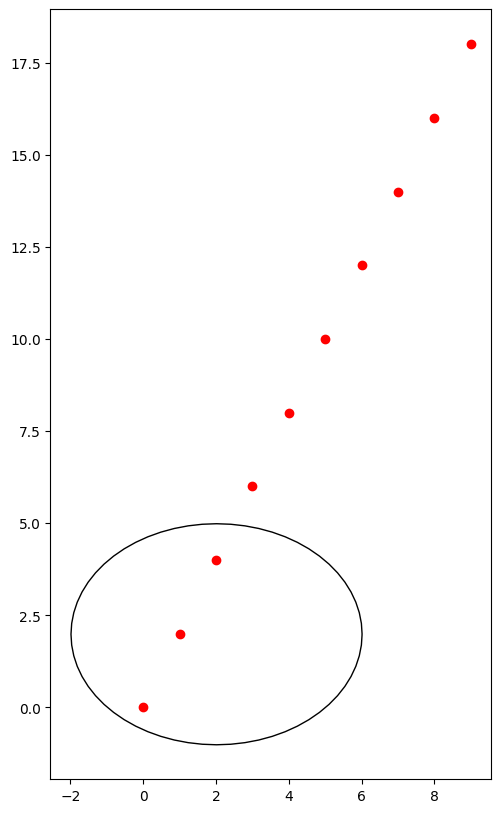

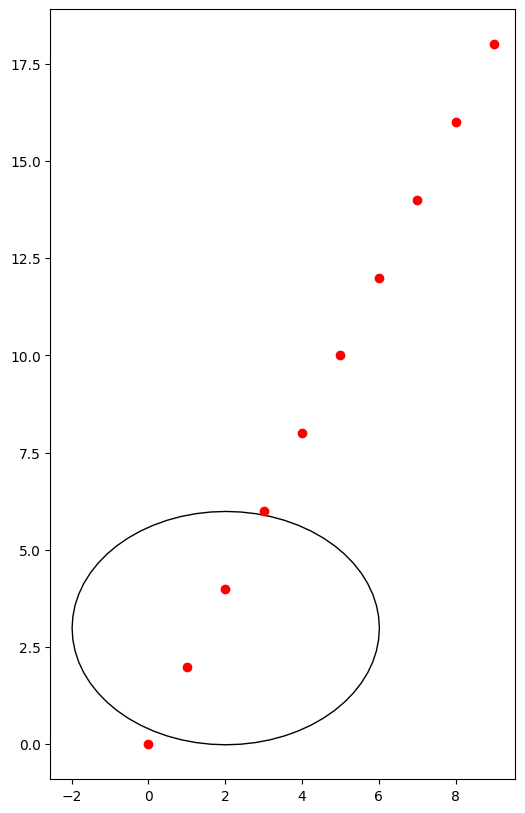

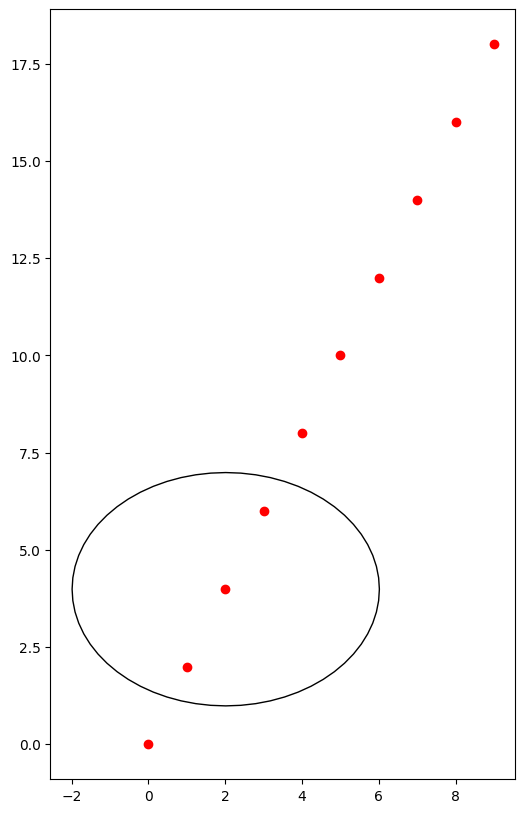

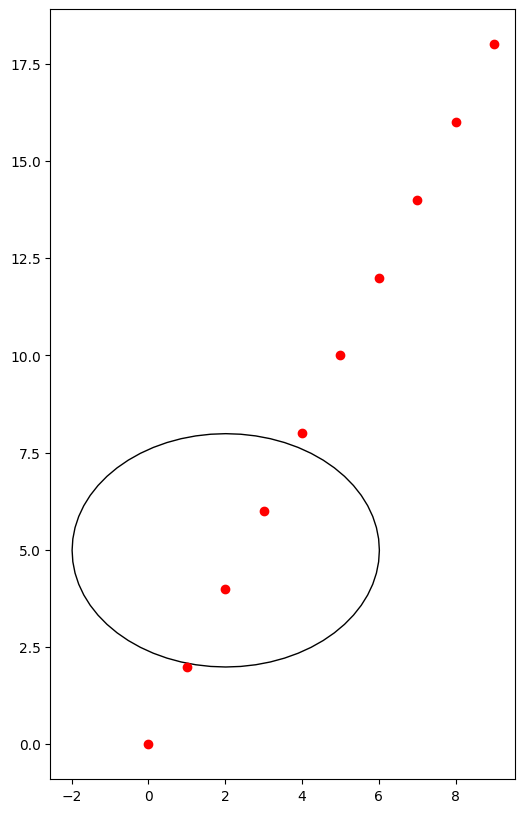

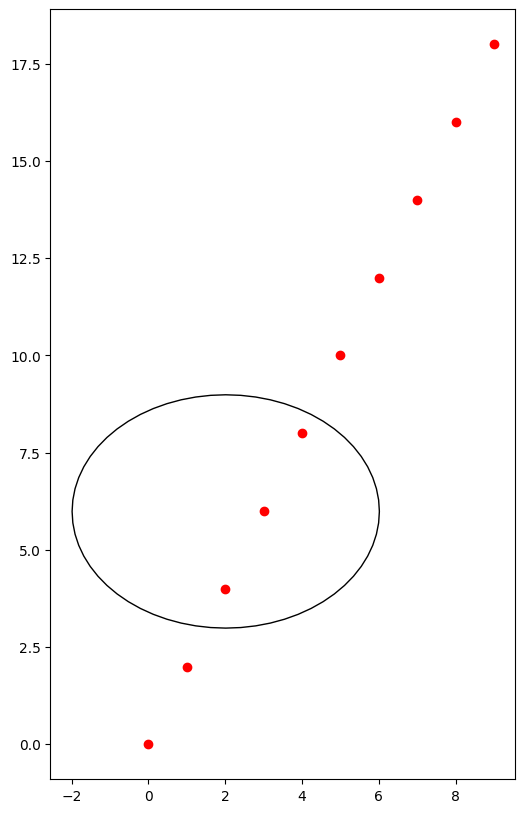

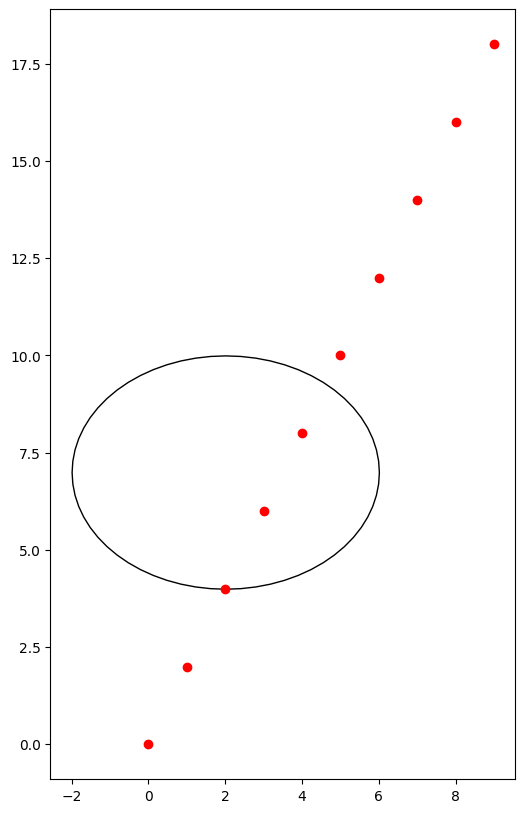

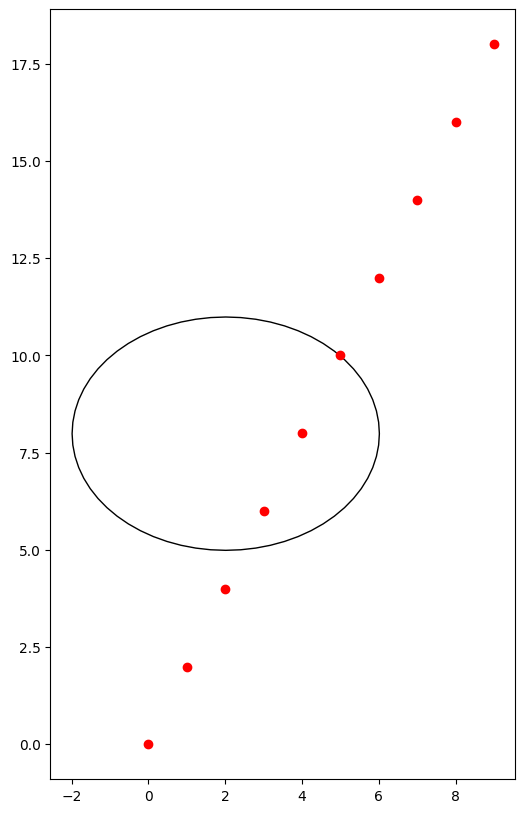

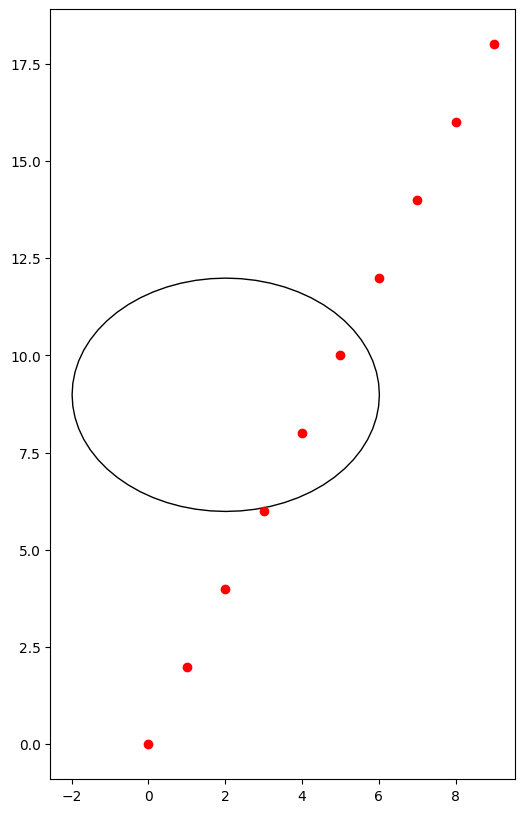

In [13]:
for x in range(8):

    elipse = tcc.cria_poligono_elipse(x,4,7,0.5)
    elipse = gpd.GeoSeries(elipse, crs = 4326)
    lista = tcc.coleta_pontos_dentro_da_elipse(pontos, elipse)
    print(lista)
    valores_filtrados = pontos[pontos['geometry'].isin(lista)]
    media = valores_filtrados['Elevation'].mean()
    print(media)
    print(valores_filtrados)
    #base = elipse.plot(color = 'white', edgecolor = 'black',figsize=(10,10))
    #pontos.plot(ax = base, color = 'red', figsize=(10,10))

for y in range(10):
    
    elipse = tcc.cria_poligono_elipse(2,y,4,3)
    elipse = gpd.GeoSeries(elipse, crs = 4326)
    tcc.coleta_pontos_dentro_da_elipse(pontos, elipse)
    base = elipse.plot(color = 'white', edgecolor = 'black',figsize=(10,10))
    pontos.plot(ax = base, color = 'red', figsize=(10,10))

In [ ]:
pontos['geometry']

0     POINT (0.00000 0.00000)
1     POINT (1.00000 2.00000)
2     POINT (2.00000 4.00000)
3     POINT (3.00000 6.00000)
4     POINT (4.00000 8.00000)
5    POINT (5.00000 10.00000)
6    POINT (6.00000 12.00000)
7    POINT (7.00000 14.00000)
8    POINT (8.00000 16.00000)
9    POINT (9.00000 18.00000)
Name: geometry, dtype: geometry

In [ ]:
lista_de_pontos = list(pontos['geometry'])
contem = []

for ponto in lista_de_pontos:
    if elipse.intersects(ponto).any(): # O método any() verifica se o elemento retorna True
        contem.append(ponto)

contem

[<POINT (0 0)>, <POINT (1 2)>, <POINT (2 4)>]

In [ ]:
pontos.head()

Latitude  Longitude  Elevation                 geometry
0         0          0       1000  POINT (0.00000 0.00000)
1         2          1        800  POINT (1.00000 2.00000)
2         4          2        700  POINT (2.00000 4.00000)
3         6          3        550  POINT (3.00000 6.00000)
4         8          4        300  POINT (4.00000 8.00000)

In [ ]:
valores_filtrados = pontos[pontos['geometry'].isin(contem)]
média = valores_filtrados['Elevation'].mean()

In [ ]:

for i in pontos.geometry: # lista de pontos
    if i in contem: # Lista que contem dentro da elipse
        print(i) # preciso retornar pontos[i].elevation

POINT (0 0)
POINT (1 2)
POINT (2 4)


#### Criando grid

In [ ]:
print(pontos.total_bounds)

# Atribuindo variáveis dentro da lista de dados do total bounds aos valores mínimos e máximos

minx, miny, maxx, maxy = pontos.total_bounds
print(f"mínima coordenada de x: {minx}\nmáxima coordenada de x: {maxx}\nmínima coordenada de y: {miny}\nmáxima coordenada de y: {maxy}")

[ 0.  0.  9. 18.]
mínima coordenada de x: 0.0
máxima coordenada de x: 9.0
mínima coordenada de y: 0.0
máxima coordenada de y: 18.0


In [ ]:
grid_de_x = np.arange(minx - 1,maxx + 1, 1, dtype='float64')
#grid_de_x

# Criando um Array para os valores do eixo Y utilizando arange da numpy

grid_de_y = np.arange(miny - 1, maxy + 1, 1, dtype='float64')
#grid_de_y

# Criando Grid de coordenadas com meshgrid da numpy

xi, yi = np.meshgrid(grid_de_x, grid_de_y)
# Acessando valores no Grid de coordenadas e criando uma lista de tuplas com as respectivas coordenadas
lista_de_tuplas = []
for x, y in np.nditer([xi,yi]):  # Iterando o Grid x e y
    lista_de_tuplas.append((x,y)) # Adicionando cada elemento x e y em uma tupla, correspondendo às coordenadas do grid

# Acessando valores dentro da lista de tuplas e atribuindo às listas com os respectivos valores de latitude e longitude

Latitude = []
Longitude = []
for i in lista_de_tuplas:
    Latitude.append(i[0]) # Buscando elementosna posição zero (Latitude) da lista de tuplas e adicionando em uma nova lista de floats
    Longitude.append(i[1]) # Buscando elementosna posição um (Longitude) da lista de tuplas e adicionando em uma nova lista de floats

    # Criando um DataFrame Pandas no braço com colunas de Latitude, Longitude a efeito de visualização

df = {'Latitude': Latitude,
      'Longitude': Longitude}

df = pd.DataFrame(df)

################################################################################################################################################################

# Aplicando a classe Point() do módulo shapely.geometry que cria uma geometria de duas dimensões (ponto) e permite realizar processamentos com essas geometrias

pontos_geometricos = [Point(i) for i in lista_de_tuplas] # Laço for pythonico 
# Equivaleria a um:
# for i in lista de tuplas:
    # pontos_geometricos = Point(i)

geo_dados = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry=pontos_geometricos) # OBS: TENHO QUE FAZER ALGO PARA EPSG SER SEMPRE IGUAL AO DOS PONTOS.
geo_dados

Latitude Longitude                   geometry
0       -1.0      -1.0  POINT (-1.00000 -1.00000)
1        0.0      -1.0   POINT (0.00000 -1.00000)
2        1.0      -1.0   POINT (1.00000 -1.00000)
3        2.0      -1.0   POINT (2.00000 -1.00000)
4        3.0      -1.0   POINT (3.00000 -1.00000)
..       ...       ...                        ...
215      5.0      18.0   POINT (5.00000 18.00000)
216      6.0      18.0   POINT (6.00000 18.00000)
217      7.0      18.0   POINT (7.00000 18.00000)
218      8.0      18.0   POINT (8.00000 18.00000)
219      9.0      18.0   POINT (9.00000 18.00000)

[220 rows x 3 columns]

#### Interpolando

In [ ]:
def coleta_pontos_dentro_da_elipse(pontos: gpd.GeoDataFrame, elipse: gpd.GeoSeries) -> np.array:
    """ Verifica se existe algum ponto de um GeoDataframe que esteja dentro de uma geometria circular ou elípitica """

    lista_de_pontos = pontos['geometry']
    contem = np.array([])
    for ponto in lista_de_pontos:
        if elipse.intersects(ponto).any(): # O método any() verifica se o elemento retorna True
            contem = np.append(contem, pontos.loc[pontos['geometry'] == ponto, 'Elevation'])

    return contem

In [ ]:
poligono = cria_poligono_elipse(5,5,10,1.5)
poligono = gpd.GeoSeries(elipse, crs = 4326)

valores = coleta_pontos_dentro_da_elipse(pontos, poligono)
media = np.mean(valores)
media

833.3333333333334

In [ ]:
def series_para_array(series: pd.Series) -> np.array:
    """Converte um Pandas Series para um array."""
    
    series_pd = series
    array = np.array(series_pd)
    return array

In [ ]:
def coleta_coordenadas(array_de_pontos: np.array) -> np.array:
    """Coleta as coordenadas de um array de pontos do tipo Point e adiciona em um array contendo valores das coordenadas do tipo float"""

    coordenadas = []
    for ponto in array_de_pontos:
        coordenadas.append((ponto.x, ponto.y))
        
    return np.array(coordenadas)

In [ ]:
px = np.array(pontos['geometry'].x)
py = np.array(pontos['geometry'].y)
pz = np.array(pontos['Elevation'])

pcordinates = np.column_stack((px,py,pz))
print(pcordinates)
print(a3d_table)

[[   0.    0. 1000.]
 [   1.    2.  800.]
 [   2.    4.  700.]
 [   3.    6.  550.]
 [   4.    8.  300.]
 [   5.   10.  200.]
 [   6.   12.  100.]
 [   7.   14.   80.]
 [   8.   16.   80.]
 [   9.   18.   50.]]
[[-1.0 -1.0 None]
 [0.0 -1.0 None]
 [1.0 -1.0 None]
 [2.0 -1.0 None]
 [3.0 -1.0 None]
 [4.0 -1.0 None]
 [5.0 -1.0 None]
 [6.0 -1.0 None]
 [7.0 -1.0 None]
 [8.0 -1.0 None]
 [9.0 -1.0 None]
 [-1.0 0.0 None]
 [0.0 0.0 None]
 [1.0 0.0 None]
 [2.0 0.0 None]
 [3.0 0.0 None]
 [4.0 0.0 None]
 [5.0 0.0 None]
 [6.0 0.0 None]
 [7.0 0.0 None]
 [8.0 0.0 None]
 [9.0 0.0 None]
 [-1.0 1.0 None]
 [0.0 1.0 None]
 [1.0 1.0 None]
 [2.0 1.0 None]
 [3.0 1.0 None]
 [4.0 1.0 None]
 [5.0 1.0 None]
 [6.0 1.0 None]
 [7.0 1.0 None]
 [8.0 1.0 None]
 [9.0 1.0 None]
 [-1.0 2.0 None]
 [0.0 2.0 None]
 [1.0 2.0 None]
 [2.0 2.0 None]
 [3.0 2.0 None]
 [4.0 2.0 None]
 [5.0 2.0 None]
 [6.0 2.0 None]
 [7.0 2.0 None]
 [8.0 2.0 None]
 [9.0 2.0 None]
 [-1.0 3.0 None]
 [0.0 3.0 None]
 [1.0 3.0 None]
 [2.0 3.0 None]
 [3.0

In [ ]:
coordenadas_x = series_para_array(geo_dados['geometry'].x)
coordenadas_y = series_para_array(geo_dados['geometry'].y)
elevacao_z = np.array([None]*len(coordenadas_x))
elevation_z = series_para_array(pontos['Elevation'])
a3d = np.array([coordenadas_x, coordenadas_y, elevacao_z])
a3d_table = np.column_stack((coordenadas_x,coordenadas_y,elevacao_z))
a3d_table[0][:2]

array([-1.0, -1.0], dtype=object)

In [ ]:
def interp_media_dos_pontos(coord_x: np.array, coord_y: np.array, pontos_conhecidos: gpd.GeoDataFrame) -> np.array:
    
    valores_interpolados = []
    for coordenada_x, coordenada_y in zip(coord_x, coord_y):
        elipse = tcc.cria_poligono_elipse(coordenada_x, coordenada_y, 10, 1.5)
        elipse = gpd.GeoSeries(elipse, crs = 4326)
        Z_de_pontos_dentro_da_elipse = coleta_pontos_dentro_da_elipse(pontos_conhecidos, elipse)
        media = np.mean(Z_de_pontos_dentro_da_elipse)
        valores_interpolados = np.append(valores_interpolados, media)

    return valores_interpolados

In [ ]:
pontos.head()

Latitude  Longitude  Elevation                 geometry
0         0          0       1000  POINT (0.00000 0.00000)
1         2          1        800  POINT (1.00000 2.00000)
2         4          2        700  POINT (2.00000 4.00000)
3         6          3        550  POINT (3.00000 6.00000)
4         8          4        300  POINT (4.00000 8.00000)

In [ ]:
valores = interp_media_dos_pontos(coord_x = coordenadas_x, coord_y = coordenadas_y, pontos_conhecidos=pontos)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Prog

In [ ]:
valores

array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
         nan,   nan, 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000.,  900.,  900.,  900.,  900.,  900.,
        900.,  900.,  900.,  900.,  800.,   nan,  800.,  800.,  800.,
        800.,  800.,  800.,  800.,  800.,  800.,  800.,  800.,  750.,
        750.,  750.,  750.,  750.,  750.,  750.,  750.,  750.,  750.,
        700.,  700.,  700.,  700.,  700.,  700.,  700.,  700.,  700.,
        700.,  700.,  700.,  625.,  625.,  625.,  625.,  625.,  625.,
        625.,  625.,  625.,  625.,  625.,  550.,  550.,  550.,  550.,
        550.,  550.,  550.,  550.,  550.,  550.,  550.,  425.,  425.,
        425.,  425.,  425.,  425.,  425.,  425.,  425.,  425.,  425.,
        300.,  300.,  300.,  300.,  300.,  300.,  300.,  300.,  300.,
        300.,  300.,  250.,  250.,  250.,  250.,  250.,  250.,  250.,
        250.,  250.,  250.,  250.,  200.,  200.,  200.,  200.,  200.,
        200.,  200.,

In [ ]:
geo_dados.head(150)

Latitude Longitude                   geometry
0       -1.0      -1.0  POINT (-1.00000 -1.00000)
1        0.0      -1.0   POINT (0.00000 -1.00000)
2        1.0      -1.0   POINT (1.00000 -1.00000)
3        2.0      -1.0   POINT (2.00000 -1.00000)
4        3.0      -1.0   POINT (3.00000 -1.00000)
..       ...       ...                        ...
145      1.0      12.0   POINT (1.00000 12.00000)
146      2.0      12.0   POINT (2.00000 12.00000)
147      3.0      12.0   POINT (3.00000 12.00000)
148      4.0      12.0   POINT (4.00000 12.00000)
149      5.0      12.0   POINT (5.00000 12.00000)

[150 rows x 3 columns]

In [ ]:
valores = np.array(valores)
grid_valores = valores.reshape(20,11)

In [ ]:
xi.shape

(20, 11)

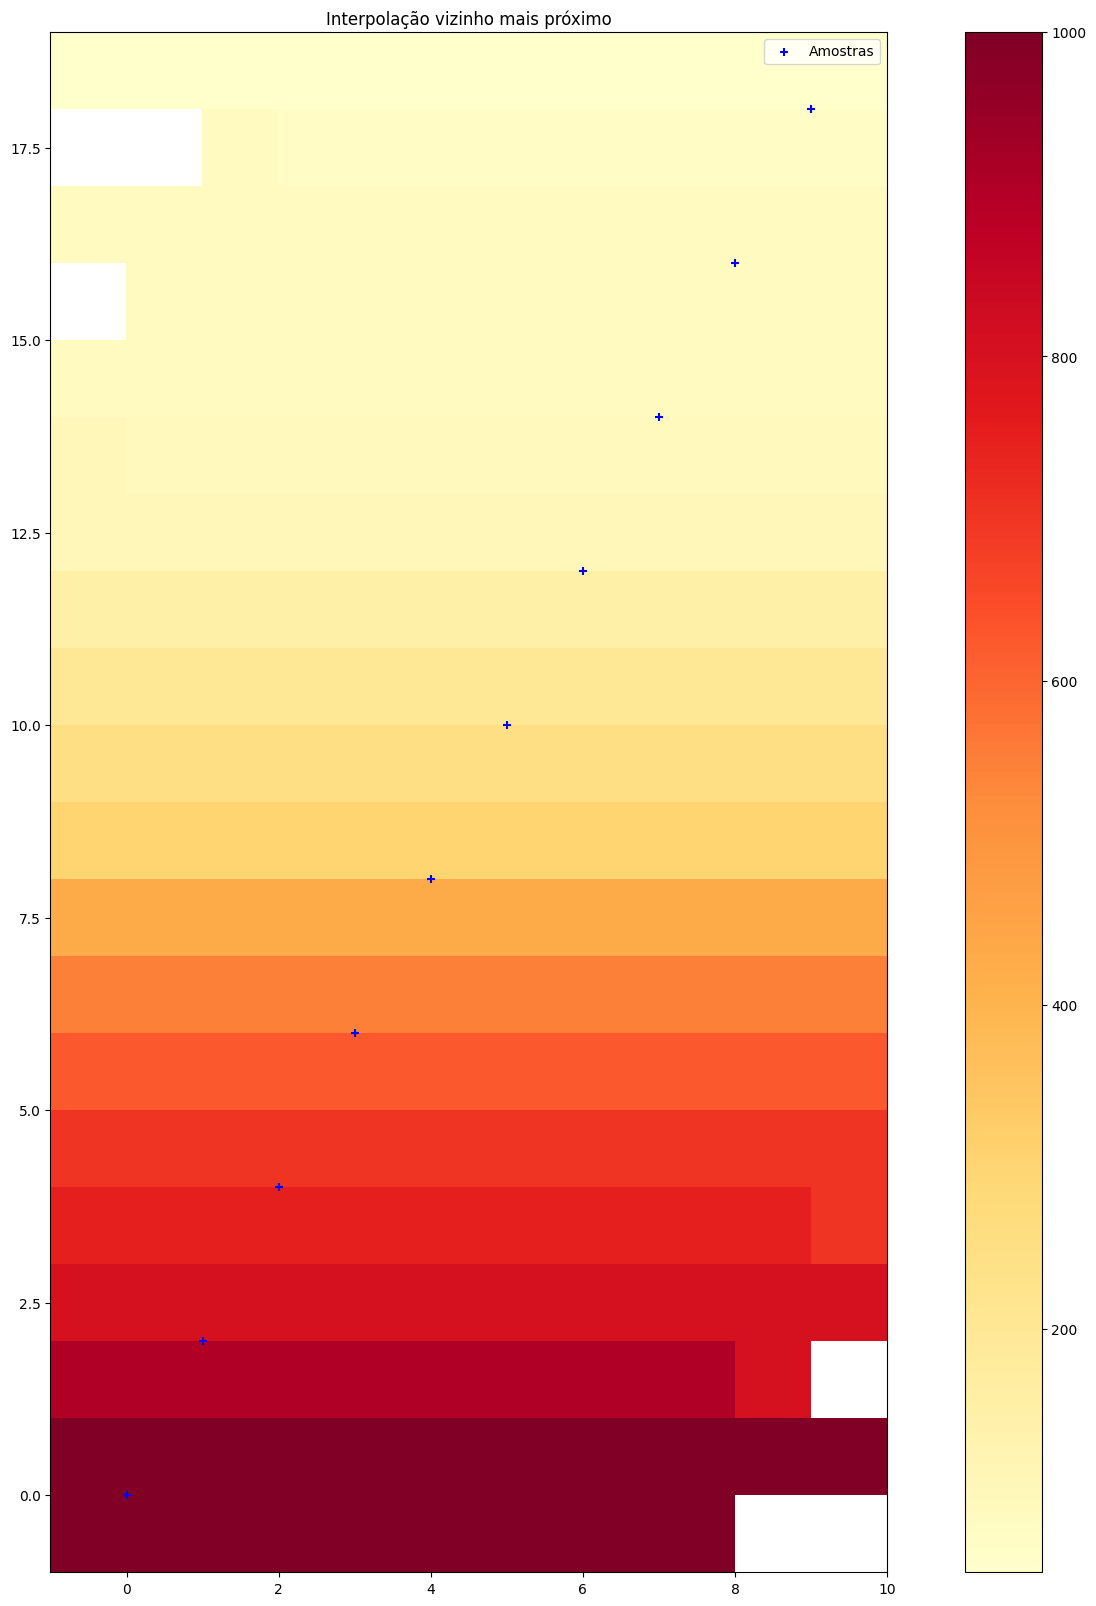

In [ ]:
# Plotagem utilizando matplotlib

fig,ax = plt.subplots(figsize = (20,20))

cax = ax.imshow(grid_valores, extent=(minx-1, maxx+1, miny-1, maxy+1), origin="lower", cmap="YlOrRd")

pontos.plot(color="blue", ax=ax, marker="+", label="Amostras")

cbar=plt.colorbar(cax, fraction = 0.08)

ax.legend()
plt.title("Interpolação vizinho mais próximo")

plt.show()

In [ ]:
mínima coordenada de x: 327593.0972529544
máxima coordenada de x: 330625.5817091203
mínima coordenada de y: 7587157.304582998
máxima coordenada de y: 7589305.797794541

In [ ]:
from osgeo import gdal
from osgeo import ogr

pts = ogr.Open('C:/Users/User/Desktop/TCC/shapefile/pontos_cotados.shp')




ma = gdal.Grid("average_clip.tif", "C:/Users/User/Desktop/TCC\Clickgeo/Dados_pratica8_9_Qgis/ptos_cotados_clip.shp", zfield="Elevation",
               algorithm = "average:radius1=1500:radius2=500:angle=0",
               outputBounds = [327593.0972529544,7587157.304582998,330625.5817091203,7589305.797794541])
               #width = xsize, height = ysize)
ma = None

In [ ]:
idw = gdal.Grid("invdist.tif", "C:/Users/User/Desktop/TCC\Clickgeo/Dados_pratica8_9_Qgis/ptos_cotados_clip.shp", zfield = "Elevation",
                algorithm = "invdist:power=1:radius1=1500:radius2=500",
                outputBounds = [327593.0972529544,7587157.304582998,330625.5817091203,7589305.797794541])
                #width = xsize, height = ysize)
idw = None

In [ ]:
ds = gdal.Open("average.tif")

# Obter a banda raster
band = ds.GetRasterBand(1)

# Ler os dados do raster como uma matriz numpy
data = band.ReadAsArray()

# Exibir os valores z para todas as coordenadas
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        valor_z = data[y, x]
        print(f"Coordenadas ({x}, {y}): Valor z = {valor_z}")

valor_z.size

Coordenadas (0, 0): Valor z = 1568.227478
Coordenadas (1, 0): Valor z = 1568.227478
Coordenadas (2, 0): Valor z = 1568.227478
Coordenadas (3, 0): Valor z = 1487.9416503333334
Coordenadas (4, 0): Valor z = 1447.7487487500002
Coordenadas (5, 0): Valor z = 1447.7487487500002
Coordenadas (6, 0): Valor z = 1447.7487487500002
Coordenadas (7, 0): Valor z = 1447.7487487500002
Coordenadas (8, 0): Valor z = 1403.7975056666667
Coordenadas (9, 0): Valor z = 1390.9107142857142
Coordenadas (10, 0): Valor z = 1390.9107142857142
Coordenadas (11, 0): Valor z = 1390.9107142857142
Coordenadas (12, 0): Valor z = 1383.616882375
Coordenadas (13, 0): Valor z = 1383.616882375
Coordenadas (14, 0): Valor z = 1370.0716065
Coordenadas (15, 0): Valor z = 1365.0650968181817
Coordenadas (16, 0): Valor z = 1365.0650968181817
Coordenadas (17, 0): Valor z = 1363.2546692499998
Coordenadas (18, 0): Valor z = 1360.5556923076922
Coordenadas (19, 0): Valor z = 1360.5556923076922
Coordenadas (20, 0): Valor z = 1360.555692307

1